In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 1.11.0


In [2]:
def get_data():
    return pd.read_csv("./ipca.csv", header=None, delimiter=";")

In [3]:
data = get_data()
df = pd.DataFrame()
df['t'] = data[1]
df['t+1'] = df['t'].shift(-1)

df.head()

,t,t+1
0,6.84,1.86
1,1.86,1.53
2,1.53,2.62
3,2.62,2.81
4,2.81,1.71


In [4]:
X, y = df.values[:, :-1], df.values[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.33)


In [5]:
# normalize data
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [6]:
# build model
# model = keras.Sequential([
#     keras.layers.Dense(units=64, activation='relu', input_dim=1),
#     keras.layers.Dense(units=10, activation='softmax')
# ])

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])


optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................

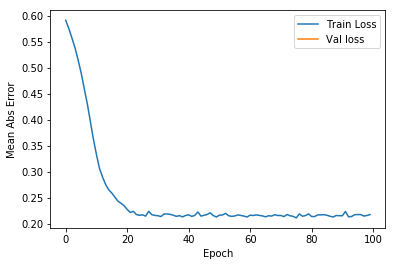

In [8]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val loss')
plt.legend()
# plt.ylim([1, 7])

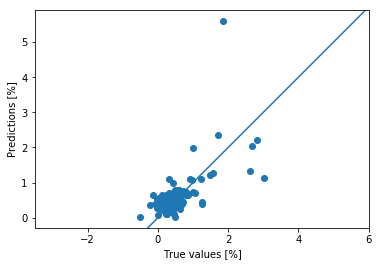

In [9]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [%]')
plt.ylabel('Predictions [%]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])